In [1]:
 import pandas as pd

Q1. 하이닉스 데이터를 불러와 각 열별 평균값,중간값,최댓값,최솟값,표준편차를 구하여 새로운 데이터 프레임을 만드시오

In [2]:
hynix=pd.read_csv('hynix.csv',encoding=('cp949'));hynix.head()
a=hynix.mean()
b=hynix.median()
c=hynix.max()
d=hynix.min()
e=hynix.std()
hynix_1=pd.DataFrame(pd.concat([a,b,c,d,e],axis=1))
hynix_1.columns=['평균값','중간값','최대값','최솟값','표준편차'];hynix_1

,평균값,중간값,최대값,최솟값,표준편차
종가,53970.333333,51350.0000,71300.0000,44700.0000,7267.162276
전일비,-837.333333,-725.0000,0.0000,-2700.0000,627.693837
등락률,0.003206,0.0024,0.0478,-0.0538,0.019385
5일,53628.933333,50870.0000,71100.0000,45420.0000,6987.164373
10일,53199.033333,50610.0000,70240.0000,44835.0000,6629.066074
20일,52357.220000,50623.0000,68850.0000,43493.0000,6039.474870
60일,49618.420000,49949.0000,61093.0000,41809.0000,4599.910439
120일,46492.120000,46480.0000,55578.0000,37965.0000,4722.036095


Q1-1. 각 열별 상관계수를 구하여 1번 문제와 서로 다른 엑셀 시트에 저장하는 엑셀 파일을 만들어 주세요.

In [3]:
f=hynix.corr()
writer = pd.ExcelWriter('하이닉스.xlsx')
hynix_1.to_excel(writer,sheet_name='여러값')
f.to_excel(writer,sheet_name='상관계수')
writer.save()

Q2.titanic데이터를 불러와 나이별 상자그림을 만든 후, 사분위수 범위를 구해 주세요.

17.875


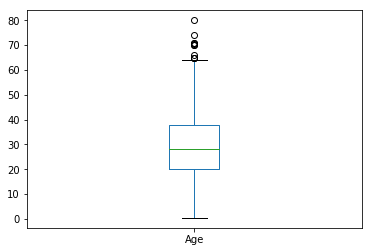

In [62]:
import datetime

titanic=pd.read_csv('titanic.csv');titanic
titanic['Age'].plot(kind='box')
db=titanic.Age.describe()
print(db.iloc[6]-db.iloc[4])

Q3. FuelData를 불러와 배기량과 도시연비를 가지고 산점도 그래프를 그린후에 가장 좋다고 생각하는 배기량 값 또는 범위와 이유를 말해주세요. Displacement=배기량, City MPG= 도시연비

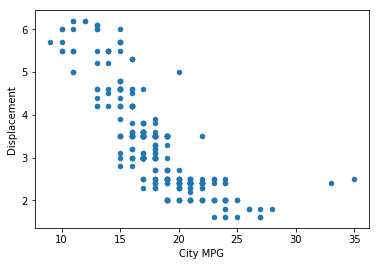

In [76]:
FuelData=pd.read_excel('FuelData.xlsx');FuelData
FuelData['Displacement'].astype('int')
FuelData['City MPG'].astype('int')
FuelData.plot(x='City MPG',y='Displacement',kind='scatter')

Q4.Restaurant데이터를 불러와 교차제표를 만드세요.

In [161]:
restaurant=pd.read_excel('Restaurant.xlsx');restaurant

restaurant_1=pd.DataFrame(index=range(0,3), columns=['10-19','20-29','30-39','40-49'])
restaurant_1.index=[['Good','VeryGood','Excellent']];restaurant_1
restaurant['Meal Price ($)'].astype('int')
restaurant_1.fillna(0,inplace=True)

for i in range(0,300):
    if restaurant['Quality Rating'][i]=='Good':
        if restaurant['Meal Price ($)'][i]>=10 and restaurant['Meal Price ($)'][i]<=19:
            restaurant_1.loc['Good','10-19']=restaurant_1.loc['Good','10-19']+1
        elif restaurant['Meal Price ($)'][i]>=20 and restaurant['Meal Price ($)'][i]<=29:
            restaurant_1.loc['Good','20-29']=restaurant_1.loc['Good','20-29']+1
        elif restaurant['Meal Price ($)'][i]>=30 and restaurant['Meal Price ($)'][i]<=39:
            restaurant_1.loc['Good','30-39']=restaurant_1.loc['Good','30-39']+1
        else:
            restaurant_1.loc['Good','40-49']=restaurant_1.loc['Good','40-49']+1
    elif restaurant['Quality Rating'][i]=='Very Good':
        if restaurant['Meal Price ($)'][i]>=10 and restaurant['Meal Price ($)'][i]<=19:
            restaurant_1.loc['VeryGood','10-19']=restaurant_1.loc['VeryGood','10-19']+1
        elif restaurant['Meal Price ($)'][i]>=20 and restaurant['Meal Price ($)'][i]<=29:
            restaurant_1.loc['VeryGood','20-29']=restaurant_1.loc['VeryGood','20-29']+1
        elif restaurant['Meal Price ($)'][i]>=30 and restaurant['Meal Price ($)'][i]<=39:
            restaurant_1.loc['VeryGood','30-39']=restaurant_1.loc['VeryGood','30-39']+1
        else:
            restaurant_1.loc['VeryGood','40-49']=restaurant_1.loc['VeryGood','40-49']+1
    elif restaurant['Quality Rating'][i]=='Excellent':
        if restaurant['Meal Price ($)'][i]>=10 and restaurant['Meal Price ($)'][i]<=19:
            restaurant_1.loc['Excellent','10-19']=restaurant_1.loc['Excellent','10-19']+1
        elif restaurant['Meal Price ($)'][i]>=20 and restaurant['Meal Price ($)'][i]<=29:
            restaurant_1.loc['Excellent','20-29']=restaurant_1.loc['Excellent','20-29']+1
        elif restaurant['Meal Price ($)'][i]>=30 and restaurant['Meal Price ($)'][i]<=39:
            restaurant_1.loc['Excellent','30-39']=restaurant_1.loc['Excellent','30-39']+1
        else:
            restaurant_1.loc['Excellent','40-49']=restaurant_1.loc['Excellent','40-49']+1
    else:
        continue
restaurant_1

,10-19,20-29,30-39,40-49
Good,42,40,2,0
VeryGood,34,64,46,6
Excellent,2,14,28,22


Q4-1. 식사비 구간별 히스토그램을 그려주세요.

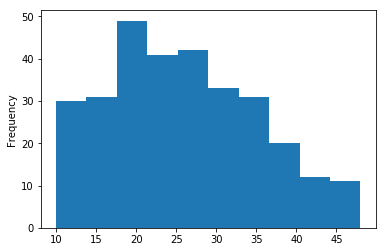

In [170]:
restaurant['Meal Price ($)'].plot(kind='hist')